<h1> Data description </h1>

In [1]:
import pandas as pd
import numpy
import pickle
import time
import gensim
import matplotlib.pyplot as plt

In [2]:
# Load the coronavirus corpus
f = open('/project/biocomplexity/sdad/projects_data/ncses/prd/Tech-Report/case_studies/coronavirus_corpus.pkl', 'rb')
df = pickle.load(f)
f.close()
df.head()

,index,original index,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,...,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,final_tokens
5122,5122,5608,95622,Host - virus interactions are greatly affected...,2008,Affect; Antiviral Agents; Area; Biochemical; D...,THE ROLE OF A HOST ION PUMP IN RNA VIRUS RECOM...,NSF,NSF,NaN,...,UNITED STATES,NaN,NaN,47.074,2008,612000.0,NaN,1,1,"[host, virus, interaction, greatly, affect, ex..."
13938,13938,15726,152221,AbstractThe American Society for Virology (ASV...,2008,abstracting; Acquired Immunodeficiency Syndrom...,"INTERNATIONAL CONGRESS OF VIROLOGY, ISTANBUL, ...",HHS,NIH,NIAID,...,UNITED STATES,2/1/2008,1/31/2009,93.855,2008,30000.0,NaN,1,1,"[american, society, virology_asv, wish, provid..."
14418,14418,17118,153617,DESCRIPTION (provided by applicant): Severe a...,2008,Abbreviations; Address; Alleles; Alphavirus; A...,SARS REVERSE GENETICS,HHS,NIH,NIAID,...,UNITED STATES,2/1/2008,1/31/2010,93.855,2008,271608.0,NaN,1,1,"[severe, acute, respiratory, syndrome, life_th..."
14514,14514,17384,153888,DESCRIPTION (provided by applicant): Human cor...,2008,Acute; Age-Years; Antigens; Archives; base; Bi...,EPIDEMIOLOGY AND CLINICAL FEATURES OF HUMAN CO...,HHS,NIH,NIAID,...,UNITED STATES,2/1/2008,1/31/2010,93.855,2008,75292.0,NaN,1,1,"[human, coronaviruse_hcov, initially, identify..."
14565,14565,17526,154033,"DESCRIPTION: Plus-stranded RNA viruses, which ...",2008,Affect; Agriculture; Animals; Antiviral Agents...,ROLES OF HOST RNA BINDING PROTEINS IN VIRUS RE...,HHS,NIH,NIAID,...,UNITED STATES,2/1/2008,1/31/2010,93.855,2008,200124.0,NaN,1,1,"[strand, rna, virus, pose, significant, risk, ..."


In [3]:
# Create the variable year
df['Year'] = df['FY']

# Build the time evolution in the number of abstracts.
Time_slice = df['PROJECT_ID'].groupby(df['FY']).count()
Time_slice.head()

FY
2008    103
2009    111
2010    103
2011    101
2012    103
Name: PROJECT_ID, dtype: int64

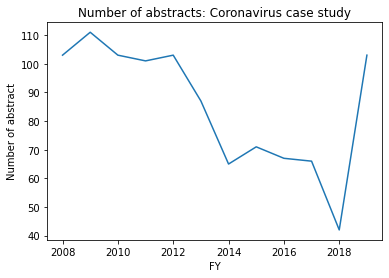

In [4]:
# Plot the time evolution in the number of abstract
serie = Time_slice.plot()
plt.title('Number of abstracts: Coronavirus case study')
plt.ylabel("Number of abstract")
plt.savefig('time_abstract_count.png')

In [5]:
# Issue between the fiscal year and the starting year of the project
df['Year1'] = df['PROJECT_START_DATE'].str[-4:]

# Crosstable comparison. Issue is coming from the project start date
# May have an impact on the deduplicated project?
pd.crosstab(df['Year1'], df['Year'])

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year1,,,,,,,,,,,,
1975,0,0,0,1,1,0,0,0,0,0,0,0
1976,0,0,1,0,0,0,0,1,0,0,0,1
1977,0,0,0,2,2,0,0,0,0,1,0,0
1979,0,0,1,0,0,0,0,0,0,0,0,0
1980,1,0,0,0,0,1,0,0,0,0,0,0
1983,1,0,1,1,1,1,0,0,1,1,0,0
1985,0,0,0,1,1,2,1,0,0,0,0,0
1988,0,0,0,0,1,0,0,0,0,0,1,0
1990,1,0,0,0,0,0,0,0,0,0,0,0
